## Spectra generation

In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

' xsec_path="f:\\Proyectos\\IA SpecAtm Bio\\Data\\Opacities Taurex"\nphoenix_path="f:\\Proyectos\\IA SpecAtm Bio\\Data"\n#xsec_path="/media/dasan/DASAN DISK/Proyectos/IA SpecAtm Bio/Data/Opacities Taurex"\n\n\n\nfrom taurex.cache import OpacityCache,CIACache\nOpacityCache().clear_cache()\nOpacityCache().set_opacity_path(xsec_path)\n\n\n\ntrappist1= mrex.Star(temperature=2566,radius=0.1192, mass=0.0898,phoenix_path=phoenix_path)\ntrappist1e= mrex.Planet(radius=0.920,mass=0.692)\n# abiotic atmosphere\natm00= mrex.Atmosphere(temperature=287,base_pressure=1e5,\n                           top_pressure=1e-3,composition={"CO2":-1},fill_gas="N2")\n\ntrappist1e.set_atmosphere(atm00)\n\nsistema=mrex.System(planet=trappist1e,star=trappist1,\n                    sma=0.02925)\nsistema.make_tm() '

In [3]:
import ast
# Función para convertir string a lista
def string_to_list(string):
    return ast.literal_eval(string)

CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data["label"] = CH4_data["label"].apply(string_to_list)
CH4_data["label"] = CH4_data["label"].apply(lambda x: x[2])
CH4_data.data = CH4_data.iloc[:,-n_points:]
CH4_data.params = CH4_data.iloc[:,:-n_points]

CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"] = CO2_data["label"].apply(string_to_list)
CO2_data["label"] = CO2_data["label"].apply(lambda x: x[2])
CO2_data.data = CO2_data.iloc[:,-n_points:]
CO2_data.params = CO2_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"] = O3_data["label"].apply(string_to_list)
O3_data["label"] = O3_data["label"].apply(lambda x: x[2])
O3_data.data = O3_data.iloc[:,-n_points:]
O3_data.params = O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data["label"] = H2O_data["label"].apply(string_to_list)
H2O_data["label"] = H2O_data["label"].apply(lambda x: x[2])
H2O_data.data = H2O_data.iloc[:,-n_points:]
H2O_data.params = H2O_data.iloc[:,:-n_points]

CH4_O3_data=pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data["label"] = CH4_O3_data["label"].apply(string_to_list)
CH4_O3_data["label"]=CH4_O3_data["label"].apply(lambda x: x[2])
CH4_O3_data.data=CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params=CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data=pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data["label"] = CH4_H2O_data["label"].apply(string_to_list)
CH4_H2O_data["label"]=CH4_H2O_data["label"].apply(lambda x: x[2])
O3_H2O_data=pd.read_csv("spec_data/O3_H2O_data.csv")
CH4_H2O_data.data=CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params=CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data["label"] = O3_H2O_data["label"].apply(string_to_list)
O3_H2O_data["label"]=O3_H2O_data["label"].apply(lambda x: x[2])
O3_H2O_data.data=O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params=O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data=pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(string_to_list)
CH4_O3_H2O_data["label"]=CH4_O3_H2O_data["label"].apply(lambda x: x[2])
CH4_O3_H2O_data.data=CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params=CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_29692\1013663148.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data = CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_29692\1013663148.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.params = CH4_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_29692\1013663148.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data = CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_29692\1013663148.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://panda

In [4]:
# Función para normalizar por filas con Min-Max, con manejo de casos especiales
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    # Diferencia entre máximos y mínimos
    range_by_row = max_by_row - min_by_row
    # Evitar división por cero asignando NaN, que luego reemplazaremos
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    # Manejar filas donde max == min (rango es cero), puedes ajustar este valor
    normalized[range_by_row == 0] = 0  # O cualquier otro valor que consideres apropiado
    return normalized

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    """
    Función para calcular y mostrar la matriz de confusión con etiquetas descriptivas y un título personalizado.

    Parámetros:
    - y_test: Array con los valores reales.
    - y_pred: Array con las predicciones del modelo.
    - labels: Lista de las etiquetas de clase en el orden en que deben ser tratadas.
    - display_labels: Lista con los nombres descriptivos para las etiquetas de las clases para visualización.
    - title: String con el título para el gráfico de la matriz de confusión.
    """
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()  # Remueve la barra de color automática para reemplazarla
    disp.im_.set_clim(0, 1)  # Asegura que los límites de la barra de colores sean de 0 a 1
    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))  # Corrige el formateador para mostrar en porcentajes

    # Ajustes de formato y título
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()

mix_ratios = np.logspace(-10,-1,10)


## SNR =1



In [8]:
SNR1_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=1)

SNR1_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                      n_repeat=500,
                                      SNR=1)
SNR1_CO2_H2O=pd.concat([SNR1_CO2,SNR1_H2O],ignore_index=True)
SNR1_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR =3



In [7]:
SNR3_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=10000,
                                   SNR=3)

SNR3_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                      n_repeat=500,
                                      SNR=3)
SNR3_CO2_H2O=pd.concat([SNR3_CO2,SNR3_H2O],ignore_index=True)
SNR3_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR= 6



In [9]:
SNR6_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                      n_repeat=10000,
                                      SNR=6)

SNR6_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                     n_repeat=500,
                                     SNR=6)

SNR6_CO2_H2O=pd.concat([SNR6_CO2,SNR6_H2O],ignore_index=True)
SNR6_CO2_H2O["label"].value_counts()


label
0    30000
1    15000
Name: count, dtype: int64

## SNR=15

In [10]:
SNR10_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=10)
SNR10_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=500,
                                        SNR=10)

SNR10_CO2_H2O=pd.concat([SNR10_CO2,SNR10_H2O],ignore_index=True)
SNR10_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## SNR=20


In [11]:
SNR20_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=20)

SNR20_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=500,
                                        SNR=20)

SNR20_CO2_H2O=pd.concat([SNR20_CO2,SNR20_H2O],ignore_index=True)
SNR20_CO2_H2O["label"].value_counts()

label
0    30000
1    15000
Name: count, dtype: int64

## No Noise

In [12]:
SNRnan_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=1e4)

SNRnan_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                        n_repeat=1000,
                                        SNR=1e4)

SNRnan_CO2_H2O=pd.concat([SNRnan_CO2,SNRnan_H2O],ignore_index=True)
SNRnan_CO2_H2O["label"].value_counts()

label
0    30000
1    30000
Name: count, dtype: int64

## ALL SNR

In [13]:
SNRall = pd.concat([SNR1_CO2_H2O,SNR3_CO2_H2O,SNR6_CO2_H2O,SNR10_CO2_H2O,SNR20_CO2_H2O,SNRnan_CO2_H2O],ignore_index=True)

SNRall["label"].value_counts()

label
0    180000
1    105000
Name: count, dtype: int64

In [14]:
SNRall_train, SNRall_test = train_test_split(SNRall, test_size=0.2,)
SNRall_train.iloc[:,-n_points:] = normalize_min_max_by_row(
    SNRall_train.iloc[:,-n_points:]
    )
SNRall_test.iloc[:,-n_points:] = normalize_min_max_by_row(
    SNRall_test.iloc[:,-n_points:]
    )
SNRall_X_train = SNRall_train.iloc[:, -n_points:]
SNRall_y_train = SNRall_train["label"].astype(int)
SNRall_X_test = SNRall_test.iloc[:, -n_points:]
SNRall_y_test = SNRall_test["label"].astype(int)

### rf

In [24]:
SNRall_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=200,
    criterion="entropy",
    min_samples_leaf=3,
    n_jobs=-1
                            )
SNRall_rf.fit(SNRall_X_train, SNRall_y_train) 

import joblib
joblib.dump(SNRall_rf, "H2O_rf.joblib")

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

[[35952    14]
 [10256 10778]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     35966
           1       1.00      0.51      0.68     21034

    accuracy                           0.82     57000
   macro avg       0.89      0.76      0.78     57000
weighted avg       0.86      0.82      0.80     57000



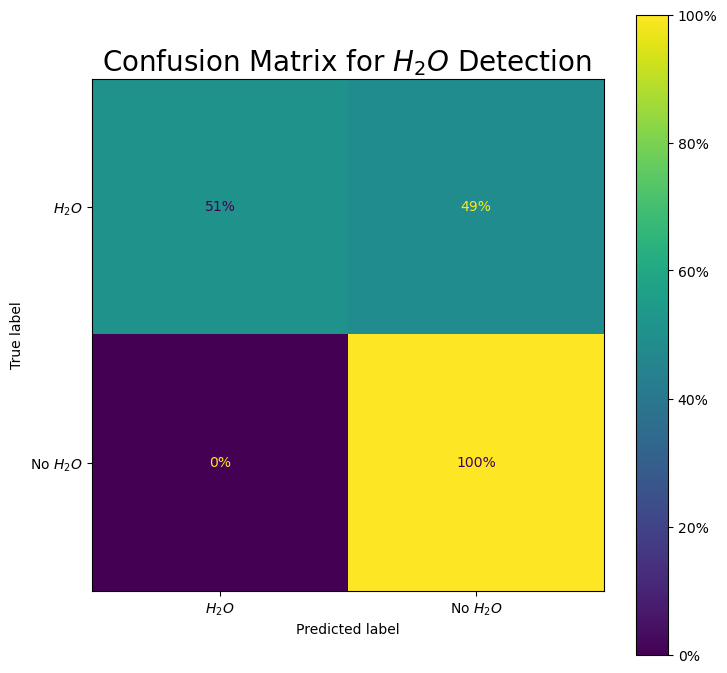

In [16]:
SNRall_probabilities = SNRall_rf.predict_proba(SNRall_X_test)[:, 1]
threshold = 0.5
SNRall_y_pred = (SNRall_probabilities > threshold).astype(int)
SNRall_test["pred"] = SNRall_y_pred
SNRall_test["score"] = SNRall_probabilities

print(confusion_matrix(SNRall_y_test, SNRall_y_pred))
print(classification_report(SNRall_y_test, SNRall_y_pred))

plot_confusion_matrix(
    SNRall_y_test, SNRall_y_pred,
    labels=[1,0], display_labels=["$H_2O$", "No $H_2O$"],
    title="Confusion Matrix for $H_2O$ Detection "
)

### scores per mix

In [17]:
SNRall_test_by_atmH2O=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNRall_test_by_atmH2O[i]=SNRall_test[SNRall_test["atm H2O"]==j]
    co2=int(len(SNRall_test[SNRall_test["label"]==0])/10)
    SNRall_test_by_atmH2O[i]=pd.concat([SNRall_test_by_atmH2O[i],
                                      SNRall_test[SNRall_test["label"]==0][i*co2:(i+1)*co2]])
    print(SNRall_test_by_atmH2O[i]["label"].value_counts())
    
    
SNRall_f1 = np.zeros(len(mix_ratios))
SNRall_recall = np.zeros(len(mix_ratios))
SNRall_precision = np.zeros(len(mix_ratios))
SNRall_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNRall_f1[j] = f1_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNRall_recall[j] = recall_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNRall_precision[j]=precision_score(
                    SNRall_test_by_atmH2O[j]["label"].astype(int),
                    SNRall_test_by_atmH2O[j]["pred"].astype(int)
                    )
                
                print(f"mix ratio:H2O={mix_ratios[j]}")
                print(confusion_matrix(SNRall_test_by_atmH2O[j]["label"].astype(int),
                                    SNRall_test_by_atmH2O[j]["pred"].astype(int)))
                
                print(f"mean score of :H2O={mix_ratios[j ]} is {SNRall_test_by_atmH2O[j][SNRall_test_by_atmH2O[j]['label']==1]['score'].mean()}")
                SNRall_score[j] = SNRall_test_by_atmH2O[j][
                    SNRall_test_by_atmH2O[j]['label']==1
                    ]['score'].mean()

label
0    3596
1    2067
Name: count, dtype: int64
label
0    3596
1    2152
Name: count, dtype: int64
label
0    3596
1    2104
Name: count, dtype: int64
label
0    3596
1    2018
Name: count, dtype: int64
label
0    3596
1    2178
Name: count, dtype: int64
label
0    3596
1    2157
Name: count, dtype: int64
label
0    3596
1    2041
Name: count, dtype: int64
label
0    3596
1    2170
Name: count, dtype: int64
label
0    3596
1    2092
Name: count, dtype: int64
label
0    3596
1    2055
Name: count, dtype: int64
mix ratio:H2O=1e-10
[[3594    2]
 [1656  411]]
mean score of :H2O=1e-10 is 0.3724949990125676
mix ratio:H2O=1e-09
[[3594    2]
 [1546  606]]
mean score of :H2O=1e-09 is 0.4655435575314578
mix ratio:H2O=1e-08
[[3595    1]
 [1484  620]]
mean score of :H2O=1e-08 is 0.48607461842326977
mix ratio:H2O=1e-07
[[3594    2]
 [1479  539]]
mean score of :H2O=1e-07 is 0.4748250149562465
mix ratio:H2O=1e-06
[[3596    0]
 [1510  668]]
mean score of :H2O=1e-06 is 0.5271938734959238
mix ratio

c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

mean score of :H2O=0.0001 is 0.7297251979642209
mix ratio:H2O=0.001
[[3596    0]
 [ 379 1791]]
mean score of :H2O=0.001 is 0.8140913332433883
mix ratio:H2O=0.01
[[3595    1]
 [ 286 1806]]
mean score of :H2O=0.01 is 0.8503580733110772
mix ratio:H2O=0.1
[[3594    2]
 [ 267 1788]]
mean score of :H2O=0.1 is 0.8661264115193403


c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

### Validation

In [20]:
SNR = 1
SNR_val_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=SNR)
SNR_val_H2O = mrex.generate_df_SNR_noise(df=H2O_data,
                                         n_repeat=1000,
                                         SNR=SNR)
SNR_val= pd.concat([SNR_val_CO2,SNR_val_H2O],ignore_index=True)

SNR_val_test = SNR_val

SNR_val_test.iloc[:,-n_points:]=normalize_min_max_by_row(
    SNR_val_test.iloc[:,-n_points:]
    )

#SNR_val_test= SNR_val_test[SNR_val_test["atm temperature"]==400]
SNR_val_X_test = SNR_val_test.iloc[:, -n_points:]
SNR_val_y_test = SNR_val_test["label"].astype(int)


In [21]:
SNR_val_X_test

,5.297569,5.290111,5.28264,5.275158,5.267664,5.260158,5.252641,5.245111,5.237568,5.230015,...,0.764875,0.756764,0.748855,0.741148,0.733644,0.726317,0.71918,0.712225,0.705435,0.698805
0,0.510329,0.418031,0.525241,0.442336,0.314720,0.496723,0.389142,0.572575,0.362606,0.515005,...,0.322805,0.780293,0.573852,0.411548,0.655572,0.381932,0.509201,0.419686,0.421120,0.588743
1,0.560182,0.420271,0.519674,0.577210,0.302444,0.213665,0.267641,0.407186,0.557218,0.705231,...,0.417363,0.287837,0.407057,0.240385,0.465463,0.182200,0.213463,0.485266,0.435264,0.488053
2,0.551082,0.559511,0.562092,0.579252,0.497299,0.560038,0.957025,0.292407,0.182781,0.496674,...,0.412313,0.666100,0.449291,0.490811,0.248301,0.494774,0.466024,0.678772,0.569893,0.572431
3,0.596295,0.446536,0.145289,0.616049,0.506590,0.409126,0.544837,0.406555,0.605655,0.530098,...,0.558905,0.431519,0.488530,0.523821,0.709614,0.650509,0.489116,0.346844,0.367676,0.519277
4,0.240289,0.605280,0.606403,0.404676,0.355369,0.496272,0.270309,0.337338,0.396251,0.515565,...,0.674213,0.259470,0.621024,0.551376,0.386781,0.215554,0.364077,0.330185,0.574426,0.471856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.548363,0.781392,0.555382,0.295967,0.620998,0.611714,0.543319,0.389006,0.485756,0.417194,...,0.485068,0.587768,0.377452,0.322769,0.592810,0.456197,0.658665,0.363403,0.397432,0.507513
59996,0.352922,0.520649,0.443451,0.417127,0.326025,0.271237,0.601715,0.471511,0.648774,0.334560,...,0.251683,0.441694,0.440464,0.352749,0.193002,0.611960,0.520778,0.463909,0.501012,0.204953
59997,0.302907,0.302088,0.661823,0.483601,0.547967,0.699761,0.577719,0.675743,0.687943,0.503064,...,0.501780,0.275590,0.429527,0.521802,0.625303,0.385297,0.607349,0.201616,0.453317,0.808087
59998,0.231869,0.370703,0.346475,1.000000,0.450247,0.671645,0.567437,0.622596,0.528216,0.265914,...,0.359335,0.552115,0.221860,0.740222,0.271010,0.549713,0.506266,0.251821,0.764199,0.262725


c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

[[20161  9839]
 [13666 16334]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63     30000
           1       0.62      0.54      0.58     30000

    accuracy                           0.61     60000
   macro avg       0.61      0.61      0.61     60000
weighted avg       0.61      0.61      0.61     60000



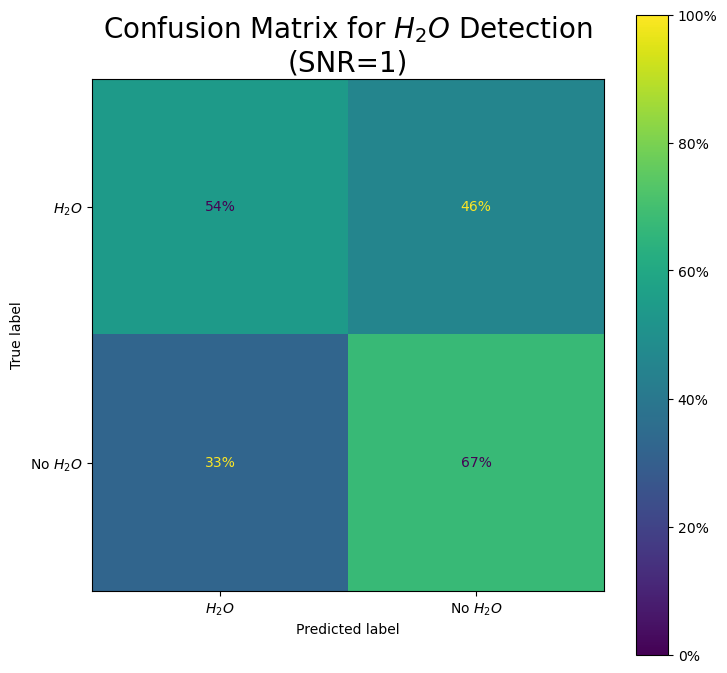

In [22]:
SNR_val_predictions = SNRall_rf.predict_proba(SNR_val_X_test)[:, 1]

# Asignar etiquetas basadas en el umbral ajustado
threshold = 0.36
SNR_val_y_pred = (SNR_val_predictions > threshold).astype(int)
SNR_val_test["pred"] = SNR_val_y_pred
SNR_val_test["score"] = SNR_val_predictions

print(confusion_matrix(SNR_val_y_test, SNR_val_y_pred))
print(classification_report(SNR_val_y_test, SNR_val_y_pred))

plot_confusion_matrix(
    SNR_val_y_test, SNR_val_y_pred,
    labels=[1,0], display_labels=["$H_2O$", "No $H_2O$"],
    title=f"Confusion Matrix for $H_2O$ Detection\n(SNR={SNR})"
)

label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64


c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

mix ratio:H2O=1e-10
[[2044  956]
 [2014  986]]
mean score of :H2O=1e-10 is 0.34322674303487904
mix ratio:H2O=1e-09
[[2020  980]
 [2043  957]]
mean score of :H2O=1e-09 is 0.341655133609106
mix ratio:H2O=1e-08
[[2035  965]
 [2013  987]]
mean score of :H2O=1e-08 is 0.34260591980024324
mix ratio:H2O=1e-07
[[1977 1023]
 [1961 1039]]
mean score of :H2O=1e-07 is 0.34553064323156424
mix ratio:H2O=1e-06
[[2029  971]
 [1835 1165]]
mean score of :H2O=1e-06 is 0.349350456767039
mix ratio:H2O=1e-05
[[1984 1016]
 [1517 1483]]
mean score of :H2O=1e-05 is 0.3606679514212639
mix ratio:H2O=0.0001
[[2045  955]
 [1108 1892]]
mean score of :H2O=0.0001 is 0.37917737326691553
mix ratio:H2O=0.001
[[2042  958]
 [ 668 2332]]
mean score of :H2O=0.001 is 0.400678650514264
mix ratio:H2O=0.01
[[2049  951]
 [ 343 2657]]
mean score of :H2O=0.01 is 0.42539238017696246
mix ratio:H2O=0.1
[[2013  987]
 [ 164 2836]]
mean score of :H2O=0.1 is 0.4487999359834746


c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not 

Text(0.5, 1.0, 'Scores for $H_2O$ Detection\n(SNR=1)')

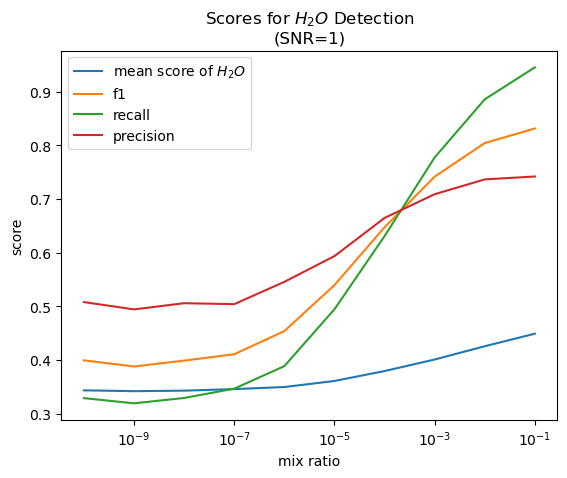

In [23]:
SNR_val_by_atmH2O=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNR_val_by_atmH2O[i]=SNR_val_test[SNR_val_test["atm H2O"]==j]
    #concatenate  CO2 spectra to each atm O3
    co2=int(len(SNR_val_test[SNR_val_test["label"]==0])/10)
    SNR_val_by_atmH2O[i]=pd.concat([SNR_val_by_atmH2O[i],
                                      SNR_val_test[SNR_val_test["label"]==0].sample(n=co2)])
    print(SNR_val_by_atmH2O[i]["label"].value_counts())
    
SNR_val_f1 = np.zeros(len(mix_ratios))
SNR_val_recall = np.zeros(len(mix_ratios))
SNR_val_precision = np.zeros(len(mix_ratios))
SNR_val_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                SNR_val_f1[j] = f1_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNR_val_recall[j] = recall_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                SNR_val_precision[j]=precision_score(
                    SNR_val_by_atmH2O[j]["label"].astype(int),
                    SNR_val_by_atmH2O[j]["pred"].astype(int)
                    )
                
                print(f"mix ratio:H2O={mix_ratios[j]}")
                print(confusion_matrix(SNR_val_by_atmH2O[j]["label"].astype(int),
                                    SNR_val_by_atmH2O[j]["pred"].astype(int)))
                
                print(f"mean score of :H2O={mix_ratios[j ]} is {SNR_val_by_atmH2O[j][SNR_val_by_atmH2O[j]['label']==1]['score'].mean()}")
                SNR_val_score[j] = SNR_val_by_atmH2O[j][
                    SNR_val_by_atmH2O[j]['label']==1
                    ]['score'].mean()


plt.figure()
plt.plot(mix_ratios,SNR_val_score,label="mean score of $H_2O$")
plt.plot(mix_ratios,SNR_val_f1,label="f1")
plt.plot(mix_ratios,SNR_val_recall,label="recall")
plt.plot(mix_ratios,SNR_val_precision,label="precision")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")

plt.legend()
plt.title(f"Scores for $H_2O$ Detection\n(SNR={SNR})")